In [6]:
import os 
import duckdb_query_graph
import json
import csv
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import matplotlib.patches as mpatches
import math
import pylab
import seaborn as sns
import re
import collections

cwd = os.getcwd()
cwd

'/Users/chuyinghe/Documents/duckdb-visualization/data/ATKEMPER4'

In [7]:
green_diamond = dict(markerfacecolor='white', marker='o', linestyle='none')
tum_colors = ["#0065BD", "#CCCCC6"]
sns.set_theme(font='serif')

In [8]:
csv = cwd + '/final/data-2.csv' 
data = pd.read_csv(csv)  
# data.shape
# data = data[data['optimizer'].isin(['SkinnerDB_no_uct','SkinnerDB_uct' 'SkinnerDB_EXP'])]
data

,query,optimizer,loop,join_order,prep_time,exec_time,total_time
0,30c.sql,DuckDB,NaN,10-3-7-4-9-6-8-5-1-0-2-11,2.988,34423.000,34426.000
1,6f.sql,DuckDB,NaN,4-2-1-3-0,0.565,2847.200,2847.780
2,22b.sql,DuckDB,NaN,7-2-9-4-6-0-1-10-5-8-3,3.242,32584.500,32587.800
3,24b.sql,DuckDB,NaN,2-1-10-9-0-11-8-7-6-5-4-3,3.163,32882.600,32885.700
4,6d.sql,DuckDB,NaN,4-2-1-3-0,0.696,416.948,417.660
...,...,...,...,...,...,...,...
6937,6b.sql,SkinnerDB,20.0,0-3-4-2-1-,9.505,390.227,404.425
6938,2a.sql,SkinnerDB,20.0,0-2-3-1-4-,6.897,257.085,269.041
6939,13d.sql,SkinnerDB,20.0,5-6-3-1-0-7-2-8-4-,15.148,2584.980,2608.440
6940,29a.sql,SkinnerDB,20.0,7-11-5-4-0-13-15-10-6-14-8-1-2-12-9-3-16-,38.257,28894.900,28945.000


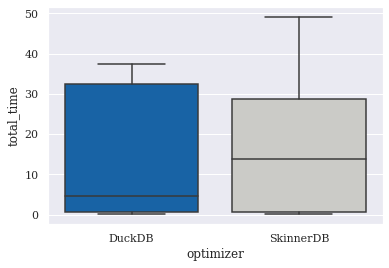

In [9]:
boxplot = sns.boxplot(x = data['optimizer'],
            y = data['total_time']*0.001, # turn milliseconds to seconds
            palette = tum_colors,
            flierprops=green_diamond, 
            whis =1
#             )
                ,showfliers=False)

# boxplot.axes.set_title(title)
# boxplot.set_xlabel(xlabel)
# boxplot.set_ylabel(ylabel)

In [32]:
data_mean = data.groupby(['query', 'optimizer']).mean()
data_mean.to_csv('final/data-2-mean.csv')
data_mean

loop  prep_time    exec_time   total_time
query   optimizer                                           
10a.sql DuckDB      NaN   3.139000  1048.444186  1051.601860
        SkinnerDB  20.0  12.163700   990.283800  1010.757150
10b.sql DuckDB      NaN   2.964744   898.411860   901.393233
        SkinnerDB  20.0  11.935000   919.414150   938.794600
10c.sql DuckDB      NaN   2.802767  1603.312791  1606.132558
...                 ...        ...          ...          ...
9b.sql  SkinnerDB  20.0  15.420000   826.461800   848.671700
9c.sql  DuckDB      NaN   3.069128  1287.773333  1290.860513
        SkinnerDB  20.0  14.820950  1883.790500  1910.602000
9d.sql  DuckDB      NaN   2.940167  1378.955714  1381.912857
        SkinnerDB  20.0  14.679150  1951.013000  1979.528500

[226 rows x 4 columns]

In [33]:
csv = cwd + '/final/data-2-mean.csv' 
data_mean = pd.read_csv(csv)  
data_mean

,query,optimizer,loop,prep_time,exec_time,total_time
0,10a.sql,DuckDB,NaN,3.139000,1048.444186,1051.601860
1,10a.sql,SkinnerDB,20.0,12.163700,990.283800,1010.757150
2,10b.sql,DuckDB,NaN,2.964744,898.411860,901.393233
3,10b.sql,SkinnerDB,20.0,11.935000,919.414150,938.794600
4,10c.sql,DuckDB,NaN,2.802767,1603.312791,1606.132558
...,...,...,...,...,...,...
221,9b.sql,SkinnerDB,20.0,15.420000,826.461800,848.671700
222,9c.sql,DuckDB,NaN,3.069128,1287.773333,1290.860513
223,9c.sql,SkinnerDB,20.0,14.820950,1883.790500,1910.602000
224,9d.sql,DuckDB,NaN,2.940167,1378.955714,1381.912857


In [51]:
data_mean['query'].unique()

array(['10a.sql', '10b.sql', '10c.sql', '11a.sql', '11b.sql', '11c.sql',
       '11d.sql', '12a.sql', '12b.sql', '12c.sql', '13a.sql', '13b.sql',
       '13c.sql', '13d.sql', '14a.sql', '14b.sql', '14c.sql', '15a.sql',
       '15b.sql', '15c.sql', '15d.sql', '16a.sql', '16b.sql', '16c.sql',
       '16d.sql', '17a.sql', '17b.sql', '17c.sql', '17d.sql', '17e.sql',
       '17f.sql', '18a.sql', '18b.sql', '18c.sql', '19a.sql', '19b.sql',
       '19c.sql', '19d.sql', '1a.sql', '1b.sql', '1c.sql', '1d.sql',
       '20a.sql', '20b.sql', '20c.sql', '21a.sql', '21b.sql', '21c.sql',
       '22a.sql', '22b.sql', '22c.sql', '22d.sql', '23a.sql', '23b.sql',
       '23c.sql', '24a.sql', '24b.sql', '25a.sql', '25b.sql', '25c.sql',
       '26a.sql', '26b.sql', '26c.sql', '27a.sql', '27b.sql', '27c.sql',
       '28a.sql', '28b.sql', '28c.sql', '29a.sql', '29b.sql', '29c.sql',
       '2a.sql', '2b.sql', '2c.sql', '2d.sql', '30a.sql', '30b.sql',
       '30c.sql', '31a.sql', '31b.sql', '31c.sql', '32a.sql

In [70]:
d = {'query': [], 
     'pred_ratio': [],
     'exec_ratio': [],
     'total_ratio': []
    }
df = pd.DataFrame(data=d)
df

,query,pred_ratio,exec_ratio,total_ratio


In [71]:
for sql in data_mean['query'].unique():
    data_sql = data_mean[data_mean['query']==sql]
    a = float(data_sql[data_sql['optimizer']=='DuckDB']['prep_time'])
    b = float(data_sql[data_sql['optimizer']=='SkinnerDB']['prep_time'])
    
    c = float(data_sql[data_sql['optimizer']=='DuckDB']['exec_time'])
    d = float(data_sql[data_sql['optimizer']=='SkinnerDB']['exec_time'])
    
    e = float(data_sql[data_sql['optimizer']=='DuckDB']['total_time'])
    f = float(data_sql[data_sql['optimizer']=='SkinnerDB']['total_time'])
    
    df = df.append({'query': sql,
                        'pred_ratio': float(a/b),
                        'exec_ratio': float(c/d),
                        'total_ratio': float(e/f)
                       }, ignore_index=True)


In [72]:
df

,query,pred_ratio,exec_ratio,total_ratio
0,10a.sql,0.258063,1.058731,1.040410
1,10b.sql,0.248408,0.977157,0.960160
2,10c.sql,0.242663,1.604360,1.573122
3,11a.sql,0.188508,0.925605,0.859636
4,11b.sql,0.183742,0.902085,0.819889
...,...,...,...,...
108,8d.sql,0.248479,0.298676,0.298420
109,9a.sql,0.193249,0.946540,0.930525
110,9b.sql,0.208120,0.965967,0.944489
111,9c.sql,0.207080,0.683608,0.675630


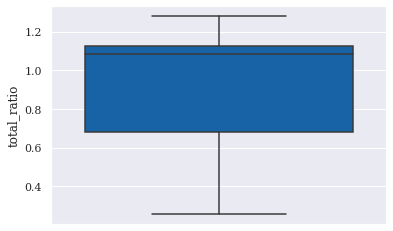

In [74]:
boxplot = sns.boxplot(
            y = df['total_ratio'], # turn milliseconds to seconds
            palette = tum_colors,
            flierprops=green_diamond, 
            whis =1
#             )
                ,showfliers=False)

In [82]:
df = df[df["total_ratio"]<2]

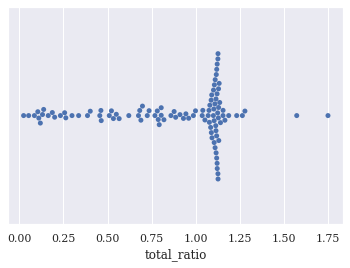

In [84]:
ax = sns.swarmplot(x=df["total_ratio"])
plt.savefig('final/ratio.pdf')